# Testing ONNX export

In [5]:
import cv2
import numpy as np
import onnxruntime as rt
import matplotlib.pyplot as plt

## Loading the Image

In [6]:
img_path = '../samples/image1.png'
orig_image = cv2.imread(img_path)
orig_dim = orig_image.shape[:2]
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

image = np.array(orig_image, dtype=np.float32) / 255.0
image = cv2.resize(image, (256, 256))
image = np.transpose(image, (2, 0, 1))
image = np.expand_dims(image, axis=0)

Text(0.5, 1.0, 'Transformed Image')

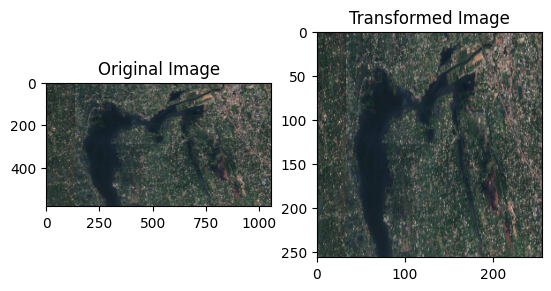

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image[0].transpose(1, 2, 0))
plt.title('Transformed Image')

## Predicting the mask and resizing it

In [8]:
onnx_path = '../weights/model.onnx'
session = rt.InferenceSession(onnx_path)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

pred_onx = session.run([output_name], {input_name: image.astype(np.float32)})[0]
pred_onx = pred_onx > 0.5
print(pred_onx.shape)
pred_onx = cv2.resize(pred_onx[0, 0].astype(np.uint8) , (orig_dim[1], orig_dim[0]))

(1, 1, 256, 256)


## Comparing the mask to the original image

Text(0.5, 1.0, 'Predicted Mask')

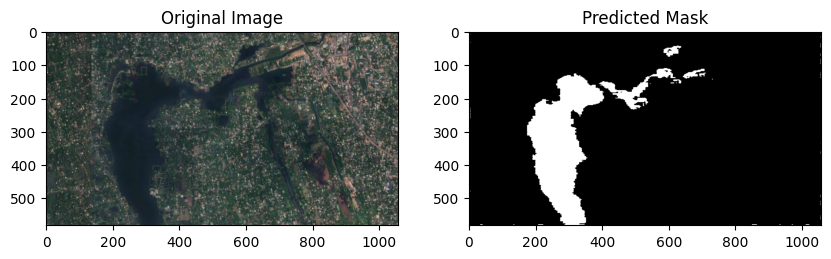

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(pred_onx, cmap='gray')
plt.title('Predicted Mask')